## **IMPORTS**

In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import module.feature_selection as feature_selection
import module.visualization as visualization
import module.classification_model as classification_model

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [47]:
%%capture
%run data_preprocessing.ipynb

## **DECISION TREE**

In [48]:
# Salvo le Features in variabili indicative per Decision Tree
dt_X_train = X_train_smote.copy()
dt_X_test = X_test.copy()

### **Feature Selection**
Per garantire la **comparabilità tra i risultati dei modelli** e **aumentare le performance dell'Albero Decisionale**, effettuiamo un'operazione di **Feature Selection** con **SKB** e **RFE**.

In [49]:
# Inizializzo il modello di Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

Con **calculate_accuracy()**, calcoliamo l'accuracy del modello sui **dati di train** con le Features selezionate dai rispettivi algoritmi di Feature Selection.

In [50]:
# Calcolo le accuracy di DT con SKB
dt_skb_accuracies = feature_selection.calculate_accuracy('skb', decision_tree, dt_X_train, y_train_smote)

100%|██████████| 22/22 [00:04<00:00,  4.69it/s]

Riserve utili su attivo totale: 0.7555878084179971
Valore Netto per Azione (A): 0.7118650217706821
Capitale proprio/Passività: 0.7998911465892599
Tasso di flusso di cassa: 0.7978955007256895
Margine Lordo Operativo: 0.7900580551523948
Flusso di cassa per azione: 0.8147677793904208
Profitto operativo per persona: 0.8243831640058055
Aliquota fiscale (A): 0.8091799709724239
Debito totale/ Patrimonio netto totale: 0.8054789550072569
Rotazione totale degli asset: 0.8130986937590711
Percentuale di reinvestimento del contante: 0.812989840348331
Tasso di interesse netto dopo le tasse: 0.8225689404934687
Crediti in sospeso/Patrimonio netto: 0.8187227866473149
Tasso crescita valore netto: 0.8130261248185777
Tasso di crescita dell'utile operativo: 0.837844702467344
Aliquota degli interessi sul debito: 0.8265239477503629
Debito a lungo termine su attività correnti: 0.8264513788098695
Livello di idoneità dei fondi a lungo termine (A): 0.8322206095791002
Tasso di Spesa Operativa: 0.8359941944847605


In [51]:
# Calcolo le accuracy di DT con RFE
dt_rfe_accuracies = feature_selection.calculate_accuracy('rfe', decision_tree, dt_X_train, y_train_smote)

100%|██████████| 22/22 [00:02<00:00,  9.34it/s]

Riserve utili su attivo totale: 0.7555878084179971
Debito totale/ Patrimonio netto totale: 0.7997822931785196
Tasso di interesse netto dopo le tasse: 0.8073657474600869
Debito a lungo termine su attività correnti: 0.8415820029027576
Tasso di crescita dell'utile operativo: 0.8531930333817128
Grado di leva finanziaria (DFL): 0.8416182873730044
Profitto operativo per persona: 0.8283018867924529
Percentuale di reinvestimento del contante: 0.83211175616836
Margine Lordo Operativo: 0.8416182873730044
Crediti in sospeso/Patrimonio netto: 0.8361030478955007
Tasso di Spesa Operativa: 0.8379535558780843
Flusso di cassa per azione: 0.8283744557329463
Valore Netto per Azione (A): 0.837844702467344
Aliquota degli interessi sul debito: 0.8396589259796807
Aliquota fiscale (A): 0.8281930333817126
Tasso crescita valore netto: 0.828265602322206
Livello di idoneità dei fondi a lungo termine (A): 0.8471698113207546
Rotazione totale degli asset: 0.8358490566037735
Indice di Rotazione dell'Attivo Corrente: 

Con **k_accuracy_lineplot()**, visualizzaziamo con lineplot un confronto tra l'accuracy di SKB e l'accuracy di RFE, mettendo in evidenza il **k ottimale**, ovvero il numero di Features selezionate dai rispettivi algoritmi di Feature Selection che aumentano le prestazioni dell'Albero Decisionale:
- Il k ottimale con **SKB** è **7** per un accuracy pari a **0.8244**
- Il k ottimale con **RFE** è **5** per un accuracy pari a **0.8532**

Come nei modelli precedenti, il **k ottimale** viene scelto ad occhio per garantire un **corretto trade-off tra complessità e generalizzazione**: 
- nel caso di **RFE**, il k ottimale coincide con il k che garantisce l'accuracy più elevata (**massimo assoluto**)
- nel di **SKB**, il k ottimale non coincide con il k che garantisce l'accuracy più elevata per evitare **problemi di overfitting**

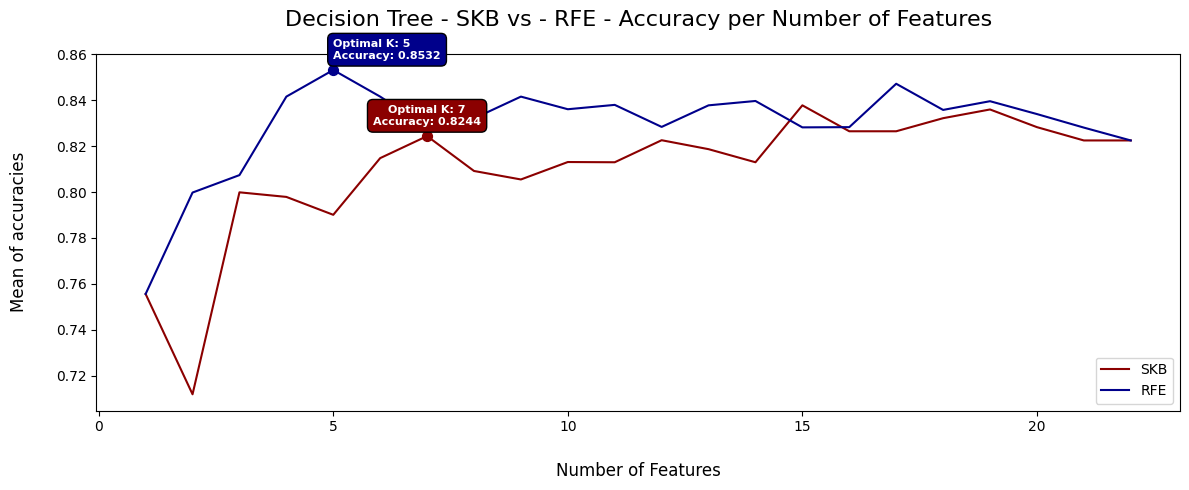

In [52]:
visualization.k_accuracy_lineplot('Decision Tree', dt_skb_accuracies, dt_rfe_accuracies, 7, 5)

Con **features_selection()**, salviamo quali sono le Features più significative, per SKB ed RFE, con l'Albero Decisionale.

In [53]:
dt_skb_selected_features = feature_selection.feature_selection('skb', decision_tree, dt_X_train, y_train_smote, 7)
dt_rfe_selected_features = feature_selection.feature_selection('rfe', decision_tree, dt_X_train, y_train_smote, 5)

Con **features_selection_venn_diagram()**, visualizziamo quali sono le Features selezionate sia da SKB che da RFE, in modo da ottenere un'idea sulle Features più significative:
- L'unica Features in comune tra i due algoritmi è **Riserve utili su attivo totale**


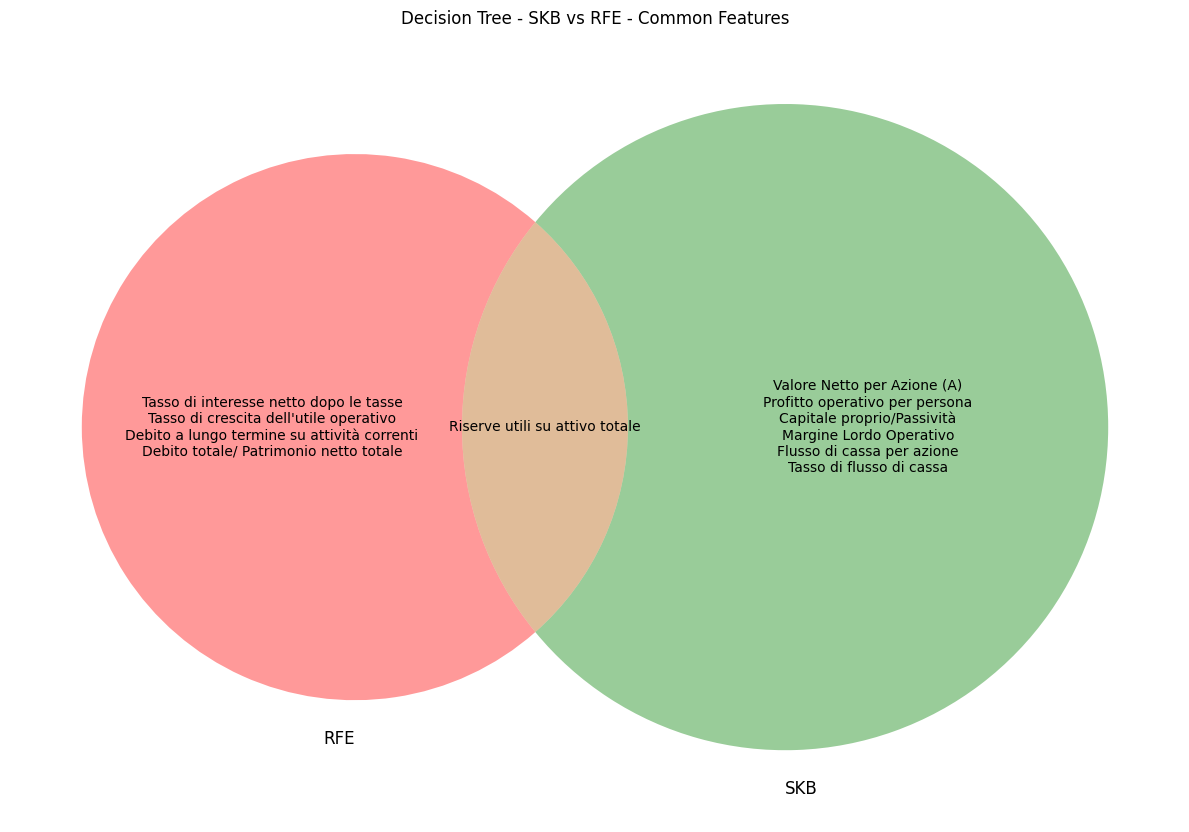

In [54]:
visualization.features_selection_venn_diagram('Decision Tree', dt_skb_selected_features, dt_rfe_selected_features)

Con **model_accuracy()**, calcoliamo l'accuracy dell'Albero Decisionale sui dati di Test, con le Features selezionate dai rispettivi algoritmi di Feature Selection, e salviamo le rispettive previsioni (**y_pred**):
- **SKB** - Test Accuracy: **0.7432**
- **RFE** - Test Accuracy: **0.8243**

Confrontando le accuracy, possiamo affermare che le Features selezionate da **RFE** sono quelle che aumentano il potere predittivo del modello.

In [55]:
# SKB
dt_skb_y_pred, dt_skb_accuracy = classification_model.model_accuracy(decision_tree, dt_skb_selected_features, dt_X_test[dt_skb_selected_features.columns], y_train_smote, y_test)

Test Accuracy: 0.7432432432432432


In [56]:
# RFE
dt_rfe_y_pred, dt_rfe_accuracy = classification_model.model_accuracy(decision_tree, dt_rfe_selected_features, dt_X_test[dt_rfe_selected_features.columns], y_train_smote, y_test)

Test Accuracy: 0.8243243243243243


Con **confusion_matrix_heatmap_comparison()**, visualizziamo la **matrice di confusione** dell'Albero Decisionale, divisa per SKB ed RFE.

**SKB**:
- **True Negatives** (**0**): il modello ha indovinato **30** compagnie che non vanno in bancarotta
- **False Positives** (**1**): il modello ha classificato **7** compagnie non in bancarotta come se andassero in bancarotta
- **False Negatives** (**0**): il modello ha classificato **12** compagnie in bancarotta come se non andassero in bancarotta
- **True Positives** (**1**): il modello ha indovinato **25** compagnie che vanno in bancarotta

**RFE**:
- **True Negatives** (**0**): il modello ha indovinato **33** compagnie che non vanno in bancarotta
- **False Positives** (**1**): il modello ha classificato **4** compagnie non in bancarotta come se andassero in bancarotta
- **False Negatives** (**0**): il modello ha classificato **9** compagnie in bancarotta come se non andassero in bancarotta
- **True Positives** (**1**): il modello ha indovinato **28** compagnie che vanno in bancarotta

In [57]:
# Calcolo la matrice di confusione sul Test Set sia per SKB che RFE
dt_skb_conf_matrix = confusion_matrix(y_test, dt_skb_y_pred)
dt_rfe_conf_matrix = confusion_matrix(y_test, dt_rfe_y_pred)

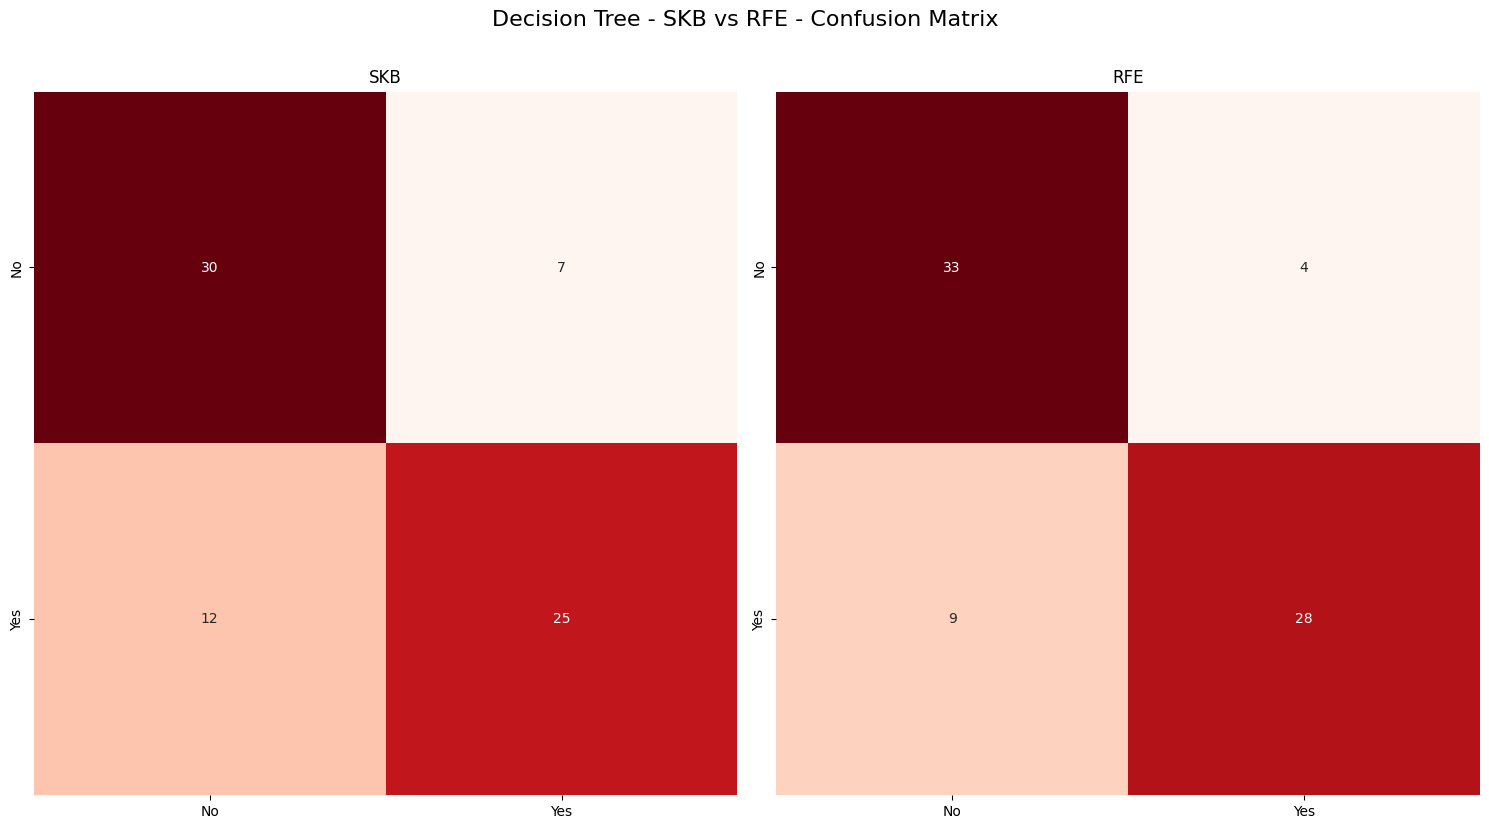

In [86]:
visualization.confusion_matrix_heatmap_comparison('Decision Tree', dt_skb_conf_matrix, dt_rfe_conf_matrix)

Con **conf_matrix_coefficients_analysis()**, analizziamo i **coefficienti** della matrice di confusione divisa per SKB ed RFE. Confrontando gli output:
- **Precisione**: tra le compagnie classificate come in bancarotta, **RFE** riesce a indovinare significativamente meglio i casi corretti rispetto a SKB, con un tasso di successo dell'**87%** (**0.87** vs **0.78**)
- **Recall**: tra le compagnie effettivamente in bancarotta, **RFE** è decisamente migliore di SKB nell'indovinare correttamente i casi, con un tasso di successo del **75%** (**0.75** vs **0.67**) 
- **F1-score**: **RFE** ha nettamente un maggiore equilibrio tra Precisione e Recall, suggerendo che riesce a distinguere meglio di SKB tra le compagnie in bancarotta e quelle non in bancarotta (**0.81 vs 0.72**), 
- **Specificità**: **RFE** riesce a classificare decisamente meglio di SKB le compagnie che non vanno in bancarotta, indovinando l'**89% dei casi** (**0.89** vs **0.81**)

Ricordando che l'obiettivo di questa analisi è quello di **prevedere le compagnie che vanno in bancarotta**, **RFE** risulta essere nettamente il modello migliore. 

In [59]:
# Calcolo i coefficienti della Matrice di Confusione per l'Albero Decisionale con SKB
skb_dt_precision, skb_dt_recall, skb_dt_f1, skb_dt_tn, skb_dt_fp, skb_dt_fn, skb_dt_tp, skb_dt_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, dt_skb_y_pred, dt_skb_conf_matrix)

Precisione: 0.78125
Recall: 0.6756756756756757
F1-score: 0.7246376811594203
Specificità: 0.8108108108108109


In [60]:
# Calcolo i coefficienti della Matrice di Confusione per l'Albero Decisionale con RFE
rfe_dt_precision, rfe_dt_recall, rfe_dt_f1, rfe_dt_tn, rfe_dt_fp, rfe_dt_fn, rfe_dt_tp, rfe_dt_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, dt_rfe_y_pred, dt_rfe_conf_matrix)

Precisione: 0.875
Recall: 0.7567567567567568
F1-score: 0.8115942028985508
Specificità: 0.8918918918918919


Con **conf_matrix_coefficients_to_df()**, creiamo un **dataframe per le metriche della matrice di confusione**, divise per SKB ed RFE. Questo dataframe, ci torna utile nel passaggio successivo per costruire una **visualizzazione grafica**.

In [61]:
dt_conf_matrix_coefficients_df = feature_selection.conf_matrix_coefficients_to_df(
    [skb_dt_precision, rfe_dt_precision],
    [skb_dt_recall, rfe_dt_recall],
    [skb_dt_f1, rfe_dt_f1],
    [skb_dt_specificity, rfe_dt_specificity]
)

Con **conf_matrix_coefficients_barplot**, visualizziamo tramite barplot le metriche della matrice di confusione, per l'Albero Decisionale, divise per SKB ed RFE.

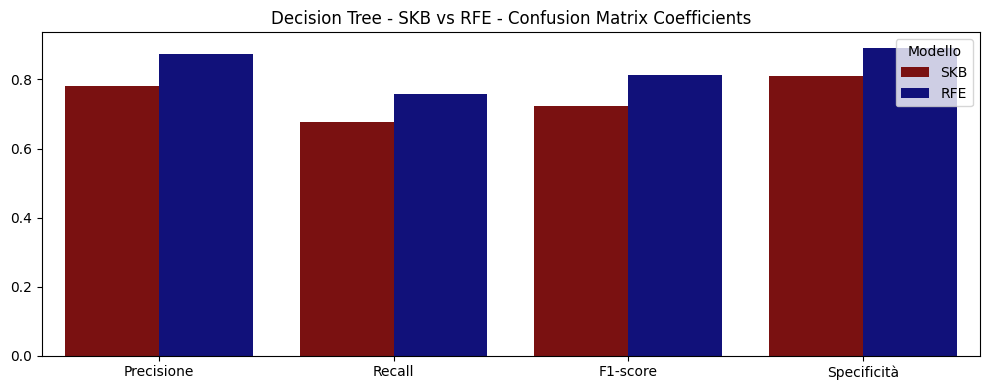

In [62]:
visualization.conf_matrix_coefficients_barplot('Decision Tree', dt_conf_matrix_coefficients_df)

Con **model_auc_roc_gini()**, calcoliamo l'**AUC-ROC** e l'**Indice di Gini** dell'Albero Decisionale, diviso per SKB ed RFE. 

Dall'output, possiamo confermare definitivamente che il **modello con le Features selezionate da RFE** è quello migliore, poiché riporta anche una **maggiore capacità di distinzione tra le classi del Target** rispetto a SKB (**0.82** vs **0.74** e **0.64** vs **0.48**).

In [63]:
dt_skb_auc, dt_skb_gini = classification_model.model_auc_roc_gini('DT SKB', dt_skb_y_pred, y_test)
dt_rfe_auc, dt_rfe_gini = classification_model.model_auc_roc_gini('DT RFE', dt_rfe_y_pred, y_test)

DT SKB - AUC-ROC: 0.7432432432432432
DT SKB - Indice di Gini: 0.4864864864864864
DT RFE - AUC-ROC: 0.8243243243243243
DT RFE - Indice di Gini: 0.6486486486486487


Con **roc_curve_plot()**, visualizziamo graficamente la **curva ROC** della Regressione Logistica, diviso per SKB ed RFE.

Anche graficamente otteniamo la conferma della superiorità del modello con **RFE**.

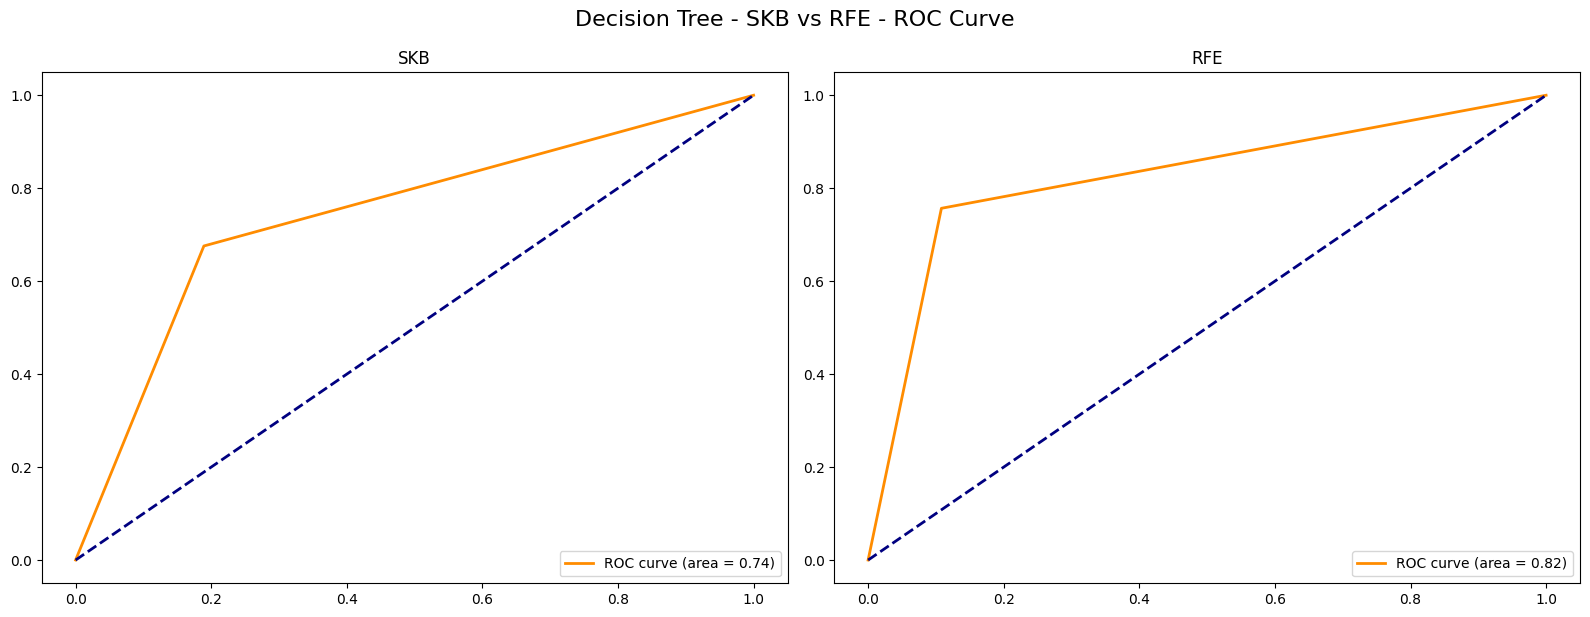

In [84]:
visualization.roc_curve_plot('Decision Tree', y_test, dt_skb_y_pred, dt_rfe_y_pred, dt_skb_auc, dt_rfe_auc)

Con **tune_decision_tree_pruning()**, andiamo a effettuare un'operazione di **post-pruning** combinata con la **K-Fold Cross Validation** sul modello con le Features selezionate da **RFE**.

In particolare, **per ogni iterazione della cross-validation**, viene generato un **albero decisionale completo**, e successivamente viene applicata la **potatura dei rami meno significativi** (ovvero quelli che contribuiscono poco alle performance del modello) sulla base del **costo di complessità**. 

Questo processo aiuta a **bilanciare la complessità dell'albero**, prevenendo l'**overfitting** e migliorando la **generalizzazione** del modello, selezionando il **miglior valore** di costo di complessità per ottimizzare le performance.

Rispetto al modello con solo RFE, otteniamo la **stessa accuracy** sui dati di train (**0.85**)

In [65]:
best_dt_score, best_dt_model = classification_model.tune_decision_tree_pruning(decision_tree, dt_rfe_selected_features, y_train_smote)

Best cross-validated accuracy: 0.85


Procediamo calcolando il test accuracy del modello ottimizzato con **post-pruning**

Il test accuracy che otteniamo è **identico** a quello precedente (**0.82**).

In [66]:
dt_y_pred, dt_test_accuracy = classification_model.model_accuracy(best_dt_model, dt_rfe_selected_features, dt_X_test[dt_rfe_selected_features.columns], y_train_smote, y_test)   

Test Accuracy: 0.8243243243243243


A questo punto calcoliamo e visualizziamo la **nuova matrice di confusione**.

In [67]:
# Calcolo nuovamente la matrice di confusione sul Test Set 
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)

Rispetto al **modello precedente**, con **solo RFE**:
- **True Negatives** (**0**): diminuisce da **33** a **30**
- **False Positives** (**1**): aumenta da **4** a **7**
- **False Negatives** (**0**): diminuisce da **9** a **6**
- **True Positives** (**1**): aumenta da **28** a **31**

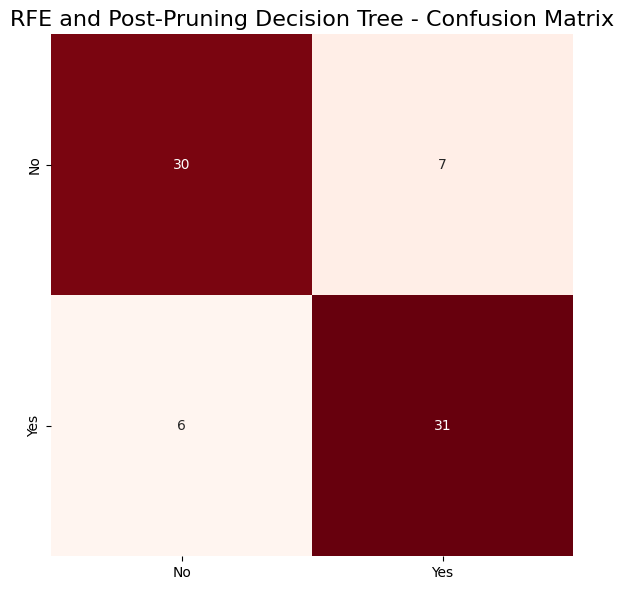

In [68]:
# Visualizzo la nuova matrice di confusione
visualization.confusion_matrix_heatmap('RFE and Post-Pruning Decision Tree', dt_conf_matrix)

Ricalcoliamo anche le metriche della matrice di confusione ovvero: **Precisione**, **Recall**, **F1-score** e **Specificity**, e li visualizziamo graficamente.

Rispetto al precedente modello con solo RFE:
- **Precisione**: diminuisce da **0.87** a **81**
- **Recall**: aumenta da **0.75** a **0.83** 
- **F1-score**:  aumenta da **0.81** a **0.82**
- **Specificità**: diminuisce da **0.89** a **0.81**

Ricordando che l'obiettivo dell'analisi è quello di **prevedere le compagnie che vanno in bancarotta** e che l'ordine di importanza delle metriche è Recall - F1 score - Precisione - Specificità, l'**Albero Decisionale attuale** risulta essere **migliore**.

In [69]:
# Calcolo i coefficienti della nuova Matrice di Confusione
dt_precision, dt_recall, dt_f1, dt_tn, dt_fp, dt_fn, dt_tp, dt_specificity = classification_model.conf_matrix_coefficients_analysis(y_test, dt_y_pred, dt_conf_matrix)

Precisione: 0.8157894736842105
Recall: 0.8378378378378378
F1-score: 0.8266666666666667
Specificità: 0.8108108108108109


In [70]:
# Creo un dataframe per le nuove metriche della matrice di confusione
dt_conf_matrix_coefficients_df = classification_model.conf_matrix_coefficients_to_df(
    dt_precision,
    dt_recall,
    dt_f1,
    dt_specificity
)

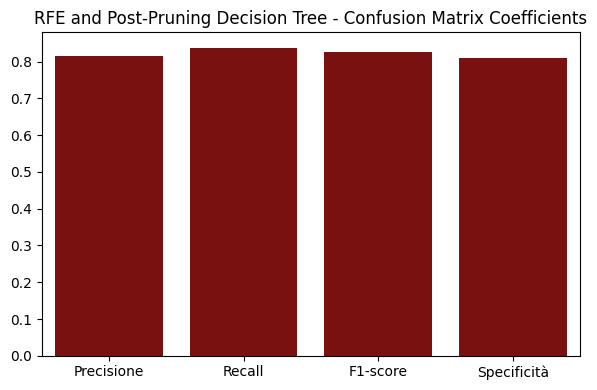

In [71]:
# Visualizzo graficamente con barplot le nuove metriche
visualization.conf_matrix_coefficients_barplot2('RFE and Post-Pruning Decision Tree', dt_conf_matrix_coefficients_df)

Per concludere, calcoliamo nuovamente l'**AUC-ROC** e l'**Indice di Gini**, e visualizziamo graficamente la **curva ROC**.

Rispetto all'Albero Decisionale con solo RFE, possiamo notare che **non ci sono state variazioni nell'AUC-ROC e l'Indice Gini**. Tuttavia, possiamo affermare che modello migliore è quello **attuale**, considerando che **Recall e F1 sono migliorati**.

In [72]:
# Calcolo nuovamente AUC-ROC e Indice di Gini
dt_auc, dt_gini = classification_model.model_auc_roc_gini('RFE and Post-Pruning DT', dt_y_pred, y_test)

RFE and Post-Pruning DT - AUC-ROC: 0.8243243243243242
RFE and Post-Pruning DT - Indice di Gini: 0.6486486486486485


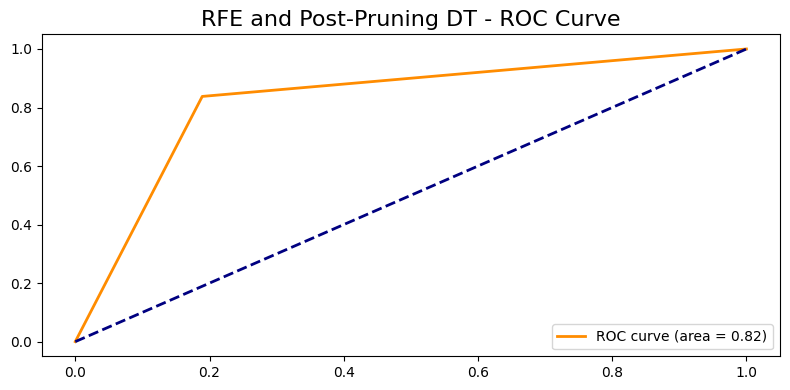

In [73]:
# Visualizzo graficamente la nuova curva ROC
visualization.roc_curve_plot2('RFE and Post-Pruning DT', y_test, dt_y_pred, dt_auc)

Con **feature_importance_df()**, creiamo un datatrame che riporta le **Features** utilizzate dal modello e l'**Importanza** associata a ciascuna di esse. Questo dataframe ci torna utile per il passaggio successivo, in cui andiamo a costruire una visualizzazione grafica.

In [74]:
# Creo un dataframe con Features e relativa importanza
dt_feature_importance_df = classification_model.feature_importance_df(best_dt_model, dt_rfe_selected_features)

Con **feature_importance_barplot()**, visualizziamo tramite barplot l'ordine di importanza delle Features utilizzate dall'Albero Decisionale.

Dal risultato che otteniamo:
- **Riserve utili su attivo totale** è la Feature **più importante** del modello
- **Tasso di interesse netto dopo le tasse** è la Feature **insignificante** del modello, suggerendo di poter essere anche rimossa

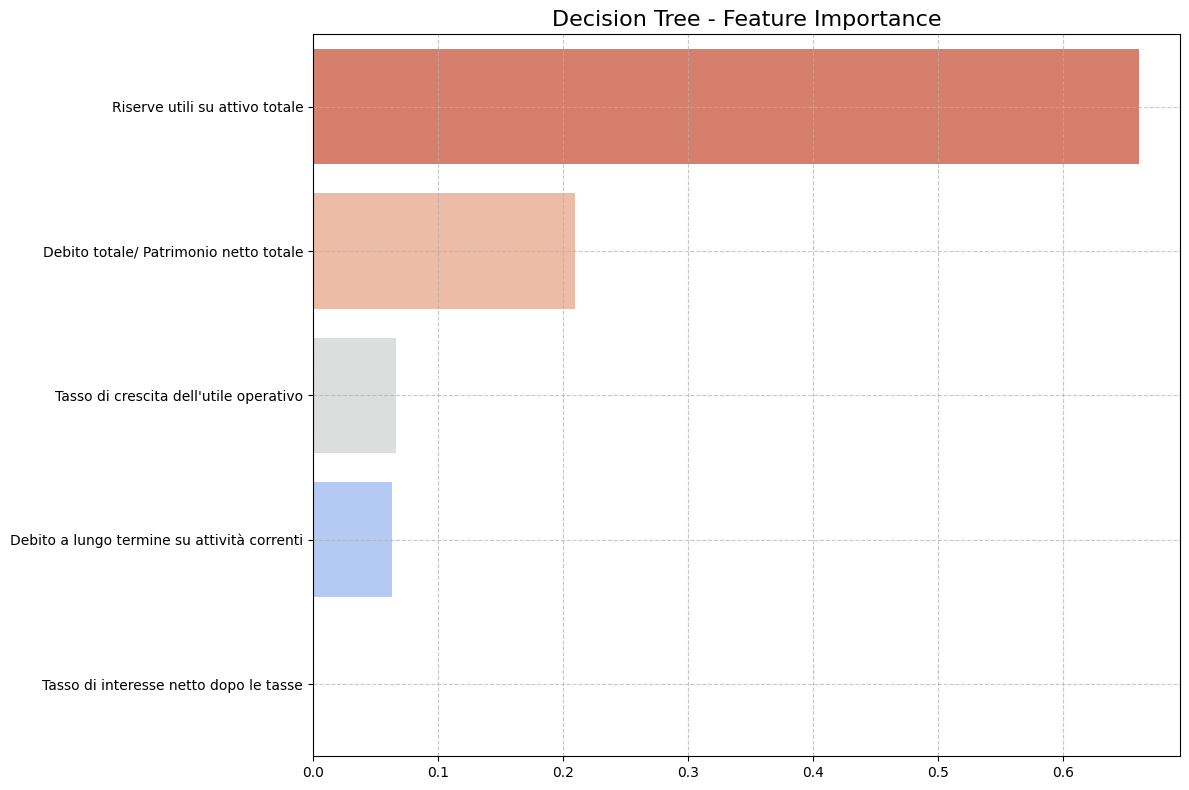

In [82]:
visualization.feature_importance_barplot('Decision Tree', dt_feature_importance_df)

Proviamo a ricalcolare il **test accuracy** dell'Albero Decisionale senza **Tasso di interesse netto dopo le tasse**.

In [76]:
# Rimuovo Tasso di interesse netto dopo le tasse dalle Features
dt_selected_features = dt_rfe_selected_features.columns[1:5]

Dal risultato, notiamo che l'accuray sui dati di test rimane **invariata**.

In [77]:
# Ricalcolo l'accuracy sui dati di Test
dt_y_pred2, dt_test_accuracy2 = classification_model.model_accuracy(best_dt_model, dt_X_train[dt_selected_features], dt_X_test[dt_selected_features], y_train_smote, y_test)

Test Accuracy: 0.8243243243243243


Procediamo a ricalcolare e visualizzare anche la **matrice di confusione**.

In [78]:
# Caclolo nuovamente la matrice di confusione
dt_conf_matrix2 = confusion_matrix(y_test, dt_y_pred2)

Dal risultato, notiamo che con o senza **Tasso di interesse netto dopo le tasse**, la matrice di confusione rimane la **stessa**. Pertanto, non ha senso proseguire nel ricalcolo delle metriche associate (**Precisione**, **Recall**, **F1-score**, **Specificità**), poiché anch'esse rimarrebbero **invariate**, così come per l'**AUC-ROC** e l'**Indice di Gini**.

Tuttavia, confermiamo che **Tasso di interesse netto dopo le tasse** può essere rimossa dalle Features selezionate, poiché le performance del modello rimangono le stesse.

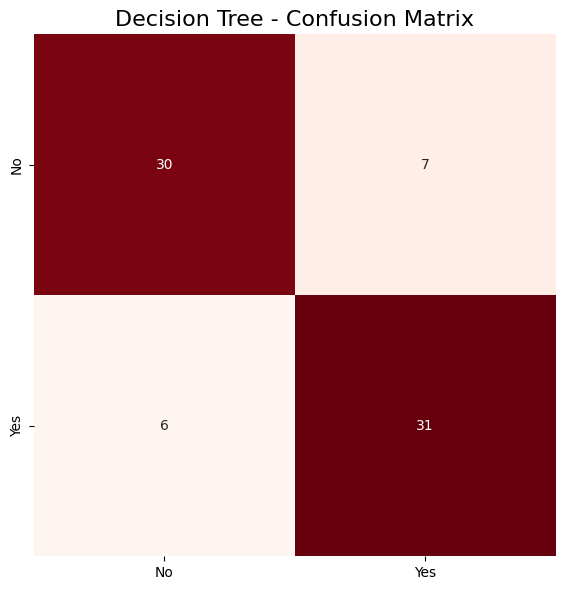

In [79]:
# Visualizzo nuovamente la matrice di confusione
visualization.confusion_matrix_heatmap('Decision Tree', dt_conf_matrix2)

Con **model_plot_tree()**, visualizziamo graficamente l'**Albero Decisionale migliore** trovato durante il **processo di training** e **pruning**.

L'**albero** è strutturato nel modo seguente:
- **Nodo radice** (**root node**): è il nodo che sta **più in alto** nell'albero e rappresenta la **prima suddivisione** dei dati
- **Nodi interni** (**internal nodes**): sono i **nodi intermedi**, che rappresentano **ulteriori suddivisioni** basate su delle condizioni
- **Foglie** (**leaf nodes**): sono i **nodi terminali** che contengono i **risultati finali**, come una **classe predetta**

Ogni **nodo** può contenere le seguenti informazioni:
- **Feature utilizzata**: indica la **Feature** su cui è stata fatta la suddivisione
- **Condizione**: rappresenta il **criterio di divisione** (es. feature <= value)
- **Gini**: misura quanto i dati sono **equamente distribuiti** tra due classi (0 e 1)
- **Samples**: indica il **numero di dati** che raggiunge quel nodo
- **Value**: mostra **quante osservazioni** appartengono a ciascuna classe (es. ééClasse 0**: **67**; **Classe 1**: **239**)
- **Class**: indica la **classe predetta** dal nodo

Infine, ogni **nodo** può avere un **colore diverso**, in base alla **classe dominante**, e un'**intensità del colore diverso**, in base alla sua **purezza**. In particolare, se il colore è **più intenso**, vuol dire che le osservazioni appartengono quasi tutte ad un'**unica classe**. Invece, se il colore è **meno intenso**, vuol dire che c'è una **distribuzione delle osservazioni più uniforme**.

Facendo un esempio di lettura del nostro albero, su **Tasso di crescita dell'utile operativo**:
- Se il valore della Feature è **minore o uguale a 0.008**, si raggiunge un **nodo terminale** (**foglia**), per cui la compagnia non va in bancarotta (**classe 0**). In caso contrario, si raggiunge invece un altro **nodo intermedio**, rappresentato da **Debito totale/Patrimonio netto totale**
- Il colore del nodo è **arancione**, associato alla **classe 0**, ed è anche **intenso**, indicando che le osservazioni appartengono quasi tutte ad una sola classe. Infatti, osservando **value**, su **218 osservazioni** (**samples**): **195** appartengono alla **classe 0** (**non in bancarotta**) e **23** alla **classe 1** (**in bancarotta**)


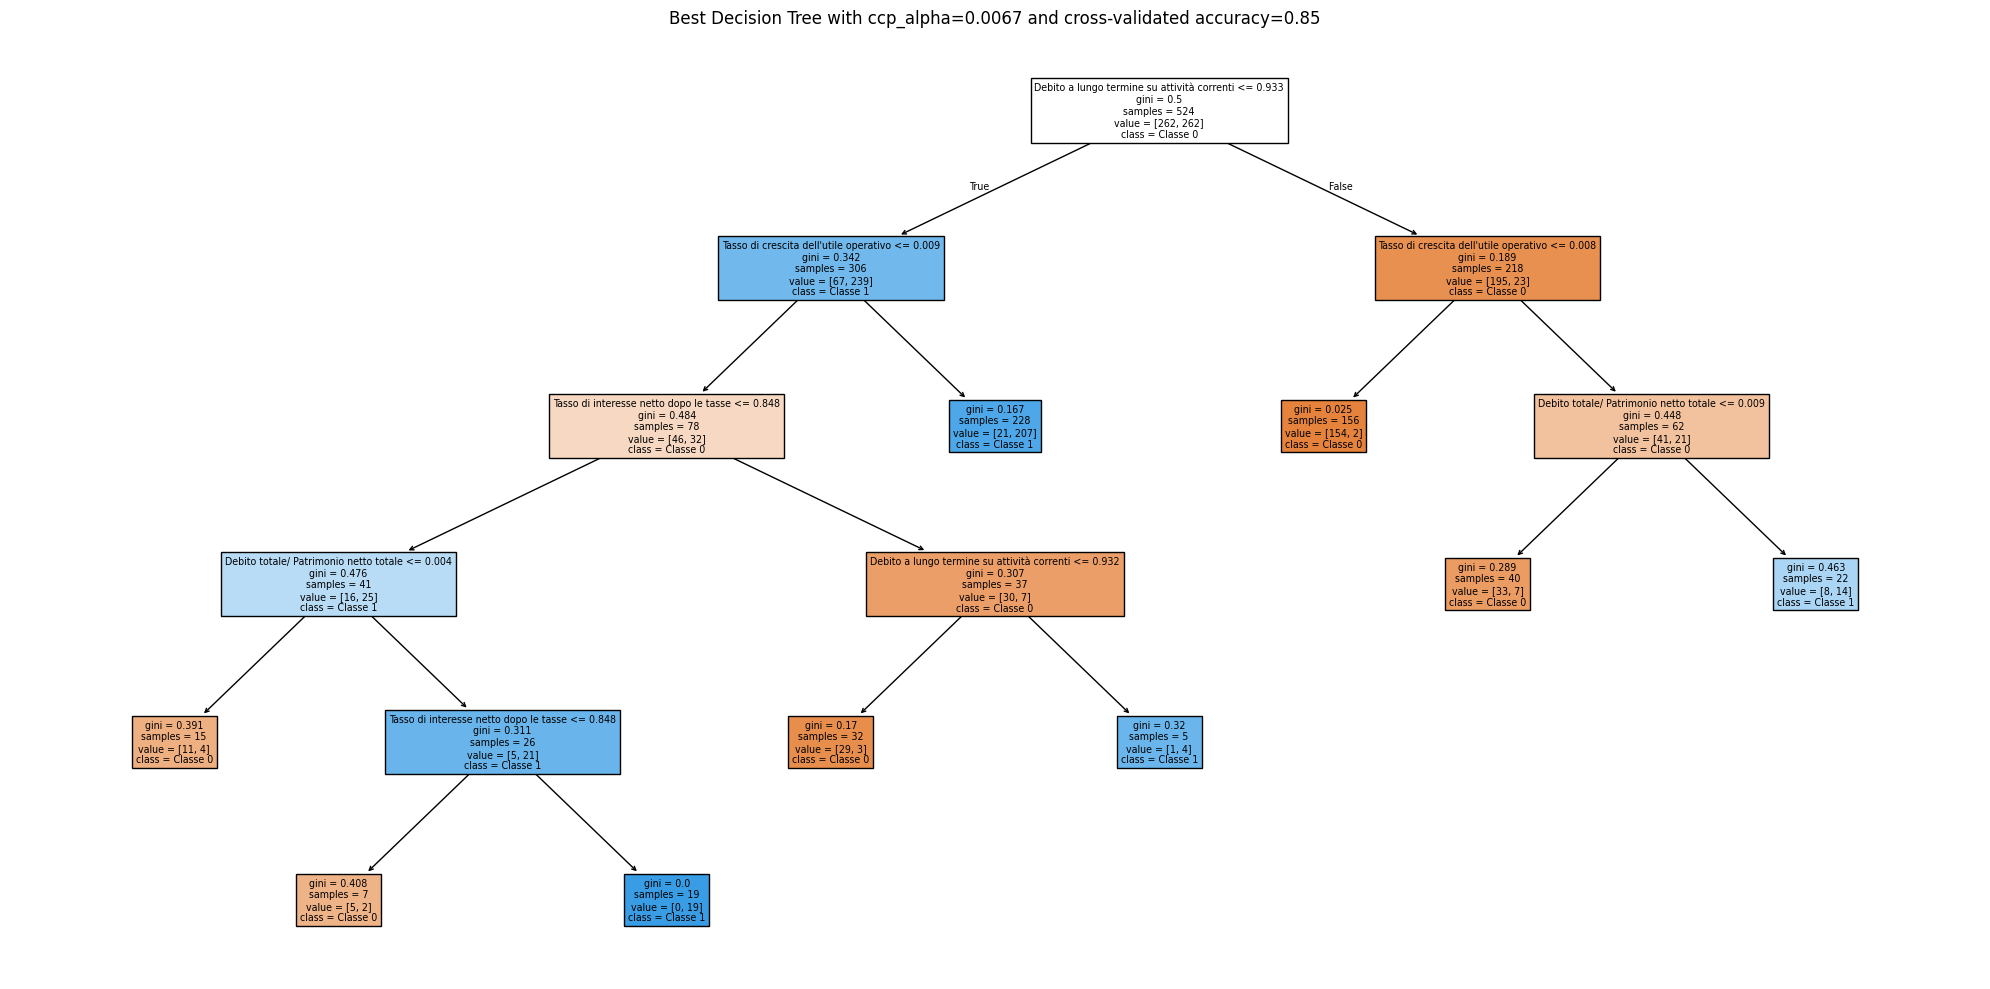

In [80]:
visualization.model_plot_tree(best_dt_model, best_dt_score, dt_rfe_selected_features, y_train_smote)